# Python Crypto Assignment 2: Predict Crypto Price Data using Regeration

### import modules

In [1]:
import requests
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def daily_price_historical(symbol, comparison_symbol, all_data=False, limit=1, aggregate=1, exchange=''):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate)
    if exchange:
        url += '&e={}'.format(exchange)
    if all_data:
        url += '&allData=true'
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

In [3]:
df = daily_price_historical('BTC', 'USD', all_data=True)
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [4]:
print (len(train), len(test))
print (train, test)

(2233, 533)
(            close         high          low         open        time  \
0         0.04951      0.04951      0.04951      0.04951  1279324800   
1         0.08584      0.08585      0.05941      0.04951  1279411200   
2         0.08080      0.09307      0.07723      0.08584  1279497600   
3         0.07474      0.08181      0.07426      0.08080  1279584000   
4         0.07921      0.07921      0.06634      0.07474  1279670400   
5         0.05050      0.08181      0.05050      0.07921  1279756800   
7         0.05454      0.06161      0.05049      0.06262  1279929600   
10        0.06000      0.06050      0.05300      0.05600  1280188800   
12        0.06990      0.06990      0.05710      0.05890  1280361600   
13        0.06270      0.06980      0.05820      0.06990  1280448000   
14        0.06785      0.06889      0.05600      0.06270  1280534400   
15        0.06110      0.06500      0.06000      0.06785  1280620800   
16        0.06000      0.06330      0.06000      0.

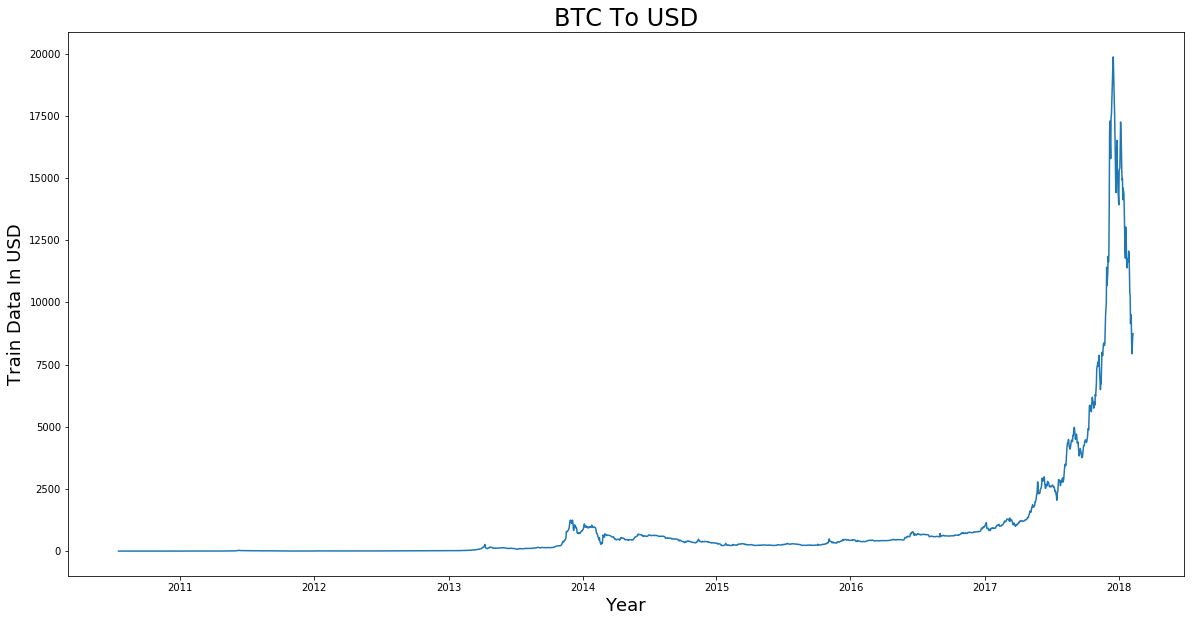

In [5]:
plt.figure(figsize=(20,10))
plt.plot(train.timestamp, train.high)
plt.title('BTC' + ' To ' + 'USD', fontsize=24)
plt.ylabel('Train Data In ' + 'USD', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.show()

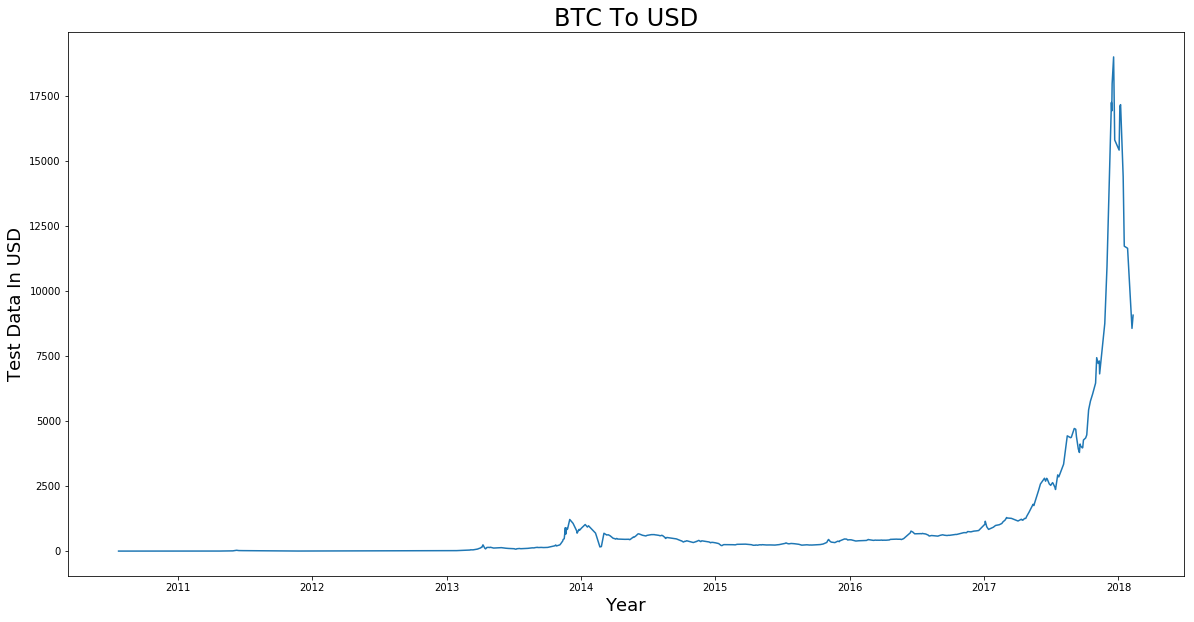

In [6]:
plt.figure(figsize=(20,10))
plt.plot(test.timestamp, test.high)
plt.title('BTC' + ' To ' + 'USD', fontsize=24)
plt.ylabel('Test Data In ' + 'USD', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.show()

In [7]:
np.set_printoptions(suppress=True)
train_X = np.asarray(train.time)
train_Y = np.asarray(train.high)
# np.set_printoptions(suppress=True)
# train_X = np.asarray([float(10000*np.random.random()) for i in xrange(4)]).astype(int)
# train_Y = train_X * 1.5

In [8]:
# Parameters
learning_rate = 0.000000000000001
training_epochs = 1
display_step = 50

In [9]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(0., name="weight")
b = tf.Variable(0., name="bias")

In [10]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [11]:
n_samples = train_X.shape[0]

print ( train_Y, train_X)
# Mean squared error
powa = (pred-Y) * (pred-Y)
cost = tf.reduce_sum(powa)/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

(array([   0.04951,    0.08585,    0.09307, ..., 7932.38   , 8643.94   ,
       8743.2    ]), array([1279324800, 1279411200, 1279497600, ..., 1517875200, 1518048000,
       1518134400]))


In [12]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

-----------------------------------------
('pred', 0.036288235)
('W', 2.8365145e-11)
('X', array(1.2793248e+09, dtype=float32))
('b', 2.2171966e-20)
('y', 0.04951)
('powa', 0.00017481502)
-----------------------------------------
-----------------------------------------
('pred', 0.072619975)
('W', 5.6760464e-11)
('X', array(1.2794112e+09, dtype=float32))
('b', 4.436602e-20)
('y', 0.08585)
('powa', 0.00017503358)
-----------------------------------------
-----------------------------------------
('pred', 0.08761413)
('W', 6.847541e-11)
('X', array(1.2794976e+09, dtype=float32))
('b', 5.352192e-20)
('y', 0.09307)
('powa', 2.976656e-05)
-----------------------------------------
-----------------------------------------
('pred', 0.08335986)
('W', 6.514606e-11)
('X', array(1.279584e+09, dtype=float32))
('b', 5.092002e-20)
('y', 0.08181)
('powa', 2.4020733e-06)
-----------------------------------------
-----------------------------------------
('pred', 0.080318086)
('W', 6.276467e-11)
('X',

-----------------------------------------
('pred', 0.06420195)
('W', 4.9995168e-11)
('X', array(1.2841632e+09, dtype=float32))
('b', 3.9085344e-20)
('y', 0.065)
('powa', 6.368784e-07)
-----------------------------------------
-----------------------------------------
('pred', 0.06265058)
('W', 4.8783803e-11)
('X', array(1.2842496e+09, dtype=float32))
('b', 3.8142096e-20)
('y', 0.0621)
('powa', 3.0314163e-07)
-----------------------------------------
-----------------------------------------
('pred', 0.06364851)
('W', 4.9557518e-11)
('X', array(1.284336e+09, dtype=float32))
('b', 3.874452e-20)
('y', 0.064)
('powa', 1.2354947e-07)
-----------------------------------------
-----------------------------------------
('pred', 0.062359713)
('W', 4.8544252e-11)
('X', array(1.2845952e+09, dtype=float32))
('b', 3.7955738e-20)
('y', 0.0619)
('powa', 2.1133512e-07)
-----------------------------------------
-----------------------------------------
('pred', 0.0613568)
('W', 4.7757107e-11)
('X', arr

('pred', 0.2776747)
('W', 2.1534627e-10)
('X', array(1.2894336e+09, dtype=float32))
('b', 1.6748769e-19)
('y', 0.24)
('powa', 0.0014193838)
-----------------------------------------
-----------------------------------------
('pred', 0.28685778)
('W', 2.2245315e-10)
('X', array(1.28952e+09, dtype=float32))
('b', 1.7299896e-19)
('y', 0.29)
('powa', 9.87347e-06)
-----------------------------------------
-----------------------------------------
('pred', 0.2966507)
('W', 2.3003198e-10)
('X', array(1.2896064e+09, dtype=float32))
('b', 1.788758e-19)
('y', 0.3)
('powa', 1.1217839e-05)
-----------------------------------------
-----------------------------------------
('pred', 0.2984057)
('W', 2.3137735e-10)
('X', array(1.2896928e+09, dtype=float32))
('b', 1.7991898e-19)
('y', 0.299)
('powa', 3.5317836e-07)
-----------------------------------------
-----------------------------------------
('pred', 0.28678492)
('W', 2.2235194e-10)
('X', array(1.2897792e+09, dtype=float32))
('b', 1.7292134e-19)

('X', array(1.2939264e+09, dtype=float32))
('b', 1.8017856e-19)
('y', 0.3)
('powa', 4.0182337e-09)
-----------------------------------------
-----------------------------------------
('pred', 0.29991415)
('W', 2.3177063e-10)
('X', array(1.2940128e+09, dtype=float32))
('b', 1.8015319e-19)
('y', 0.2999)
('powa', 2.0039526e-10)
-----------------------------------------
-----------------------------------------
('pred', 0.29990855)
('W', 2.3175083e-10)
('X', array(1.2940992e+09, dtype=float32))
('b', 1.8013789e-19)
('y', 0.2999)
('powa', 7.315837e-11)
-----------------------------------------
-----------------------------------------
('pred', 0.29923207)
('W', 2.3121265e-10)
('X', array(1.2941856e+09, dtype=float32))
('b', 1.7972205e-19)
('y', 0.299)
('powa', 5.38568e-08)
-----------------------------------------
-----------------------------------------
('pred', 0.29906297)
('W', 2.3106654e-10)
('X', array(1.294272e+09, dtype=float32))
('b', 1.7960916e-19)
('y', 0.299)
('powa', 3.9655115e

-----------------------------------------
('pred', 0.89112103)
('W', 6.857191e-10)
('X', array(1.2995424e+09, dtype=float32))
('b', 5.3049186e-19)
('y', 0.885)
('powa', 3.746712e-05)
-----------------------------------------
-----------------------------------------
('pred', 0.9227556)
('W', 7.0996753e-10)
('X', array(1.2997152e+09, dtype=float32))
('b', 5.491486e-19)
('y', 0.9329)
('powa', 0.00010290911)
-----------------------------------------
-----------------------------------------
('pred', 0.9244687)
('W', 7.112383e-10)
('X', array(1.2998016e+09, dtype=float32))
('b', 5.5012624e-19)
('y', 0.925)
('powa', 2.8229647e-07)
-----------------------------------------
-----------------------------------------
('pred', 0.92087513)
('W', 7.0842654e-10)
('X', array(1.299888e+09, dtype=float32))
('b', 5.4796316e-19)
('y', 0.9197)
('powa', 1.3808731e-06)
-----------------------------------------
-----------------------------------------
('pred', 0.9187141)
('W', 7.067171e-10)
('X', array(1.2

('powa', 0.06065182)
-----------------------------------------
-----------------------------------------
('pred', 3.521949)
('W', 2.7000926e-09)
('X', array(1.3043808e+09, dtype=float32))
('b', 2.0754206e-18)
('y', 3.49)
('powa', 0.0010207414)
-----------------------------------------
-----------------------------------------
('pred', 3.5662417)
('W', 2.7338685e-09)
('X', array(1.3044672e+09, dtype=float32))
('b', 2.101313e-18)
('y', 3.58)
('powa', 0.00018928759)
-----------------------------------------
-----------------------------------------
('pred', 3.4777055)
('W', 2.6658202e-09)
('X', array(1.3045536e+09, dtype=float32))
('b', 2.049151e-18)
('y', 3.45)
('powa', 0.0007675909)
-----------------------------------------
-----------------------------------------
('pred', 3.5786004)
('W', 2.7429792e-09)
('X', array(1.30464e+09, dtype=float32))
('b', 2.108293e-18)
('y', 3.61)
('powa', 0.0009859279)
-----------------------------------------
-----------------------------------------
('pr

-----------------------------------------
('pred', 17.523268)
('W', 1.3387168e-08)
('X', array(1.30896e+09, dtype=float32))
('b', 1.0258527e-17)
('y', 17.51)
('powa', 0.00017602701)
-----------------------------------------
-----------------------------------------
('pred', 17.889698)
('W', 1.36653036e-08)
('X', array(1.3091328e+09, dtype=float32))
('b', 1.0470985e-17)
('y', 18.0)
('powa', 0.012166525)
-----------------------------------------
-----------------------------------------
('pred', 17.606192)
('W', 1.3447856e-08)
('X', array(1.3092192e+09, dtype=float32))
('b', 1.0304895e-17)
('y', 17.52)
('powa', 0.007428919)
-----------------------------------------
-----------------------------------------
('pred', 17.294626)
('W', 1.3209007e-08)
('X', array(1.3093056e+09, dtype=float32))
('b', 1.0122471e-17)
('y', 17.2)
('powa', 0.00895398)
-----------------------------------------
-----------------------------------------
('pred', 16.869255)
('W', 1.2882424e-08)
('X', array(1.3094784e+

('b', 6.1609206e-18)
('y', 10.5)
('powa', 0.0005318884)
-----------------------------------------
-----------------------------------------
('pred', 9.964895)
('W', 7.58879e-09)
('X', array(1.3131072e+09, dtype=float32))
('b', 5.8368023e-18)
('y', 9.8)
('powa', 0.02719038)
-----------------------------------------
-----------------------------------------
('pred', 10.9500475)
('W', 8.337938e-09)
('X', array(1.31328e+09, dtype=float32))
('b', 6.4072426e-18)
('y', 11.24)
('powa', 0.08407232)
-----------------------------------------
-----------------------------------------
('pred', 11.676298)
('W', 8.890359e-09)
('X', array(1.3133664e+09, dtype=float32))
('b', 6.827857e-18)
('y', 11.89)
('powa', 0.04566863)
-----------------------------------------
-----------------------------------------
('pred', 11.401205)
('W', 8.680331e-09)
('X', array(1.3134528e+09, dtype=float32))
('b', 6.667952e-18)
('y', 11.32)
('powa', 0.006594312)
-----------------------------------------
--------------------

('X', array(1.3189824e+09, dtype=float32))
('b', 1.6073174e-18)
('y', 2.54)
('powa', 0.0154156)
-----------------------------------------
-----------------------------------------
('pred', 2.707753)
('W', 2.0526416e-09)
('X', array(1.3191552e+09, dtype=float32))
('b', 1.632168e-18)
('y', 2.72)
('powa', 0.0001499911)
-----------------------------------------
-----------------------------------------
('pred', 3.1693888)
('W', 2.4024325e-09)
('X', array(1.3192416e+09, dtype=float32))
('b', 1.8973135e-18)
('y', 3.3)
('powa', 0.017059281)
-----------------------------------------
-----------------------------------------
('pred', 3.1855488)
('W', 2.4143656e-09)
('X', array(1.3194144e+09, dtype=float32))
('b', 1.9063579e-18)
('y', 3.19)
('powa', 1.9813848e-05)
-----------------------------------------
-----------------------------------------
('pred', 3.0721092)
('W', 2.328236e-09)
('X', array(1.3195008e+09, dtype=float32))
('b', 1.8410836e-18)
('y', 3.04)
('powa', 0.0010310046)
------------

('W', 2.4317477e-09)
('X', array(1.3241664e+09, dtype=float32))
('b', 1.919068e-18)
('y', 3.22)
('powa', 1.4917987e-09)
-----------------------------------------
-----------------------------------------
('pred', 3.5970128)
('W', 2.7162583e-09)
('X', array(1.3242528e+09, dtype=float32))
('b', 2.133914e-18)
('y', 3.7)
('powa', 0.010606382)
-----------------------------------------
-----------------------------------------
('pred', 4.3063)
('W', 3.2516594e-09)
('X', array(1.3243392e+09, dtype=float32))
('b', 2.538192e-18)
('y', 4.5)
('powa', 0.037519626)
-----------------------------------------
-----------------------------------------
('pred', 4.097172)
('W', 3.093546e-09)
('X', array(1.3244256e+09, dtype=float32))
('b', 2.4188095e-18)
('y', 4.04)
('powa', 0.0032686172)
-----------------------------------------
-----------------------------------------
('pred', 4.013031)
('W', 3.0298184e-09)
('X', array(1.324512e+09, dtype=float32))
('b', 2.3706953e-18)
('y', 3.99)
('powa', 0.000530426

('pred', 5.057536)
('W', 3.802787e-09)
('X', array(1.3299552e+09, dtype=float32))
('b', 2.9558536e-18)
('y', 5.2)
('powa', 0.020295901)
-----------------------------------------
-----------------------------------------
('pred', 5.0912447)
('W', 3.827884e-09)
('X', array(1.3300416e+09, dtype=float32))
('b', 2.974723e-18)
('y', 5.1)
('powa', 7.6653654e-05)
-----------------------------------------
-----------------------------------------
('pred', 5.0744805)
('W', 3.815032e-09)
('X', array(1.330128e+09, dtype=float32))
('b', 2.965061e-18)
('y', 5.07)
('powa', 2.0073643e-05)
-----------------------------------------
-----------------------------------------
('pred', 5.0947704)
('W', 3.830037e-09)
('X', array(1.3302144e+09, dtype=float32))
('b', 2.9763414e-18)
('y', 5.1)
('powa', 2.7347389e-05)
-----------------------------------------
-----------------------------------------
('pred', 5.011806)
('W', 3.7674233e-09)
('X', array(1.3303008e+09, dtype=float32))
('b', 2.929274e-18)
('y', 4.99

('X', array(1.335744e+09, dtype=float32))
('b', 2.9156229e-18)
('y', 5.0)
('powa', 6.252683e-05)
-----------------------------------------
-----------------------------------------
('pred', 5.0016537)
('W', 3.744228e-09)
('X', array(1.3358304e+09, dtype=float32))
('b', 2.9119367e-18)
('y', 5.0)
('powa', 2.7346287e-06)
-----------------------------------------
-----------------------------------------
('pred', 5.144258)
('W', 3.850732e-09)
('X', array(1.3359168e+09, dtype=float32))
('b', 2.9916604e-18)
('y', 5.18)
('powa', 0.0012774767)
-----------------------------------------
-----------------------------------------
('pred', 5.172894)
('W', 3.8719175e-09)
('X', array(1.3360032e+09, dtype=float32))
('b', 3.0075177e-18)
('y', 5.18)
('powa', 5.049278e-05)
-----------------------------------------
-----------------------------------------
('pred', 5.154659)
('W', 3.858019e-09)
('X', array(1.3360896e+09, dtype=float32))
('b', 2.9971152e-18)
('y', 5.15)
('powa', 2.1703476e-05)
------------

-----------------------------------------
('pred', 6.5107894)
('W', 4.857e-09)
('X', array(1.340496e+09, dtype=float32))
('b', 3.7429542e-18)
('y', 6.47)
('powa', 0.0016637918)
-----------------------------------------
-----------------------------------------
('pred', 6.4619465)
('W', 4.820253e-09)
('X', array(1.3405824e+09, dtype=float32))
('b', 3.715543e-18)
('y', 6.45)
('powa', 0.00014272312)
-----------------------------------------
-----------------------------------------
('pred', 6.46851)
('W', 4.8248383e-09)
('X', array(1.3406688e+09, dtype=float32))
('b', 3.718963e-18)
('y', 6.47)
('powa', 2.2190252e-06)
-----------------------------------------
-----------------------------------------
('pred', 6.614696)
('W', 4.93356e-09)
('X', array(1.3407552e+09, dtype=float32))
('b', 3.800053e-18)
('y', 6.65)
('powa', 0.0012463774)
-----------------------------------------
-----------------------------------------
('pred', 6.659306)
('W', 4.966512e-09)
('X', array(1.3408416e+09, dtype=fl

-----------------------------------------
('pred', 13.693044)
('W', 1.0180132e-08)
('X', array(1.3450752e+09, dtype=float32))
('b', 7.704859e-18)
('y', 13.84)
('powa', 0.021596197)
-----------------------------------------
-----------------------------------------
('pred', 15.076403)
('W', 1.1207875e-08)
('X', array(1.3451616e+09, dtype=float32))
('b', 8.468888e-18)
('y', 15.4)
('powa', 0.10471499)
-----------------------------------------
-----------------------------------------
('pred', 13.312762)
('W', 9.89614e-09)
('X', array(1.345248e+09, dtype=float32))
('b', 7.4938e-18)
('y', 12.9)
('powa', 0.170373)
-----------------------------------------
-----------------------------------------
('pred', 10.870671)
('W', 8.079237e-09)
('X', array(1.3455072e+09, dtype=float32))
('b', 6.1434514e-18)
('y', 10.3)
('powa', 0.32566547)
-----------------------------------------
-----------------------------------------
('pred', 10.245907)
('W', 7.614414e-09)
('X', array(1.3455936e+09, dtype=float3

('X', array(1.3500864e+09, dtype=float32))
('b', 6.809958e-18)
('y', 12.11)
('powa', 9.3274255e-05)
-----------------------------------------
-----------------------------------------
('pred', 12.046605)
('W', 8.922269e-09)
('X', array(1.3501728e+09, dtype=float32))
('b', 6.769459e-18)
('y', 12.03)
('powa', 0.00027573854)
-----------------------------------------
-----------------------------------------
('pred', 12.00053)
('W', 8.887575e-09)
('X', array(1.3502592e+09, dtype=float32))
('b', 6.7437645e-18)
('y', 11.99)
('powa', 0.00011089083)
-----------------------------------------
-----------------------------------------
('pred', 11.992072)
('W', 8.880743e-09)
('X', array(1.3503456e+09, dtype=float32))
('b', 6.738705e-18)
('y', 11.99)
('powa', 4.2945694e-06)
-----------------------------------------
-----------------------------------------
('pred', 11.96602)
('W', 8.860883e-09)
('X', array(1.350432e+09, dtype=float32))
('b', 6.7239986e-18)
('y', 11.96)
('powa', 3.623549e-05)
------

-----------------------------------------
('pred', 13.602609)
('W', 1.0025318e-08)
('X', array(1.3568256e+09, dtype=float32))
('b', 7.583026e-18)
('y', 13.59)
('powa', 0.00015897499)
-----------------------------------------
-----------------------------------------
('pred', 13.567776)
('W', 9.998373e-09)
('X', array(1.3569984e+09, dtype=float32))
('b', 7.56317e-18)
('y', 13.56)
('powa', 6.0455393e-05)
-----------------------------------------
-----------------------------------------
('pred', 13.429553)
('W', 9.895883e-09)
('X', array(1.3570848e+09, dtype=float32))
('b', 7.487648e-18)
('y', 13.4)
('powa', 0.00087340426)
-----------------------------------------
-----------------------------------------
('pred', 13.454817)
('W', 9.913869e-09)
('X', array(1.3571712e+09, dtype=float32))
('b', 7.5009e-18)
('y', 13.46)
('powa', 2.6865768e-05)
-----------------------------------------
-----------------------------------------
('pred', 13.50874)
('W', 9.952967e-09)
('X', array(1.3572576e+09,

-----------------------------------------
('pred', 48.343575)
('W', 3.5469547e-08)
('X', array(1.36296e+09, dtype=float32))
('b', 2.6274529e-17)
('y', 48.47)
('powa', 0.01598371)
-----------------------------------------
-----------------------------------------
('pred', 48.39104)
('W', 3.5502122e-08)
('X', array(1.3630464e+09, dtype=float32))
('b', 2.6298426e-17)
('y', 48.4)
('powa', 8.029457e-05)
-----------------------------------------
-----------------------------------------
('pred', 48.058315)
('W', 3.525355e-08)
('X', array(1.3632192e+09, dtype=float32))
('b', 2.6116082e-17)
('y', 47.99)
('powa', 0.0046667475)
-----------------------------------------
-----------------------------------------
('pred', 47.552505)
('W', 3.4880298e-08)
('X', array(1.3633056e+09, dtype=float32))
('b', 2.5842297e-17)
('y', 47.45)
('powa', 0.0105072195)
-----------------------------------------
-----------------------------------------
('pred', 47.39276)
('W', 3.476092e-08)
('X', array(1.363392e+09, 

('powa', 0.6951355)
-----------------------------------------
-----------------------------------------
('pred', 109.63763)
('W', 7.997441e-08)
('X', array(1.3709088e+09, dtype=float32))
('b', 5.89508e-17)
('y', 109.6)
('powa', 0.0014158795)
-----------------------------------------
-----------------------------------------
('pred', 111.83768)
('W', 8.1574086e-08)
('X', array(1.3709952e+09, dtype=float32))
('b', 6.01176e-17)
('y', 112.25)
('powa', 0.17001025)
-----------------------------------------
-----------------------------------------
('pred', 110.54429)
('W', 8.062561e-08)
('X', array(1.3710816e+09, dtype=float32))
('b', 5.942583e-17)
('y', 110.3)
('powa', 0.059675448)
-----------------------------------------
-----------------------------------------
('pred', 105.62472)
('W', 7.703266e-08)
('X', array(1.371168e+09, dtype=float32))
('b', 5.680548e-17)
('y', 104.7)
('powa', 0.8551085)
-----------------------------------------
-----------------------------------------
('pred', 10

('X', array(1.3764384e+09, dtype=float32))
('b', 6.1076575e-17)
('y', 115.0)
('powa', 0.73395604)
-----------------------------------------
-----------------------------------------
('pred', 113.44576)
('W', 8.2414616e-08)
('X', array(1.3765248e+09, dtype=float32))
('b', 6.0704674e-17)
('y', 113.32)
('powa', 0.015816316)
-----------------------------------------
-----------------------------------------
('pred', 112.47448)
('W', 8.170388e-08)
('X', array(1.3766112e+09, dtype=float32))
('b', 6.018838e-17)
('y', 112.3)
('powa', 0.030442093)
-----------------------------------------
-----------------------------------------
('pred', 113.770355)
('W', 8.264005e-08)
('X', array(1.3766976e+09, dtype=float32))
('b', 6.086839e-17)
('y', 114.0)
('powa', 0.052736722)
-----------------------------------------
-----------------------------------------
('pred', 114.55209)
('W', 8.3202664e-08)
('X', array(1.376784e+09, dtype=float32))
('b', 6.127704e-17)
('y', 114.69)
('powa', 0.019018874)
---------

('X', array(1.3812768e+09, dtype=float32))
('b', 7.524092e-17)
('y', 142.1)
('powa', 0.3655215)
-----------------------------------------
-----------------------------------------
('pred', 141.66298)
('W', 1.0255303e-07)
('X', array(1.3813632e+09, dtype=float32))
('b', 7.532409e-17)
('y', 141.69)
('powa', 0.0007302596)
-----------------------------------------
-----------------------------------------
('pred', 141.82411)
('W', 1.0266325e-07)
('X', array(1.3814496e+09, dtype=float32))
('b', 7.540388e-17)
('y', 141.85)
('powa', 0.0006705078)
-----------------------------------------
-----------------------------------------
('pred', 142.87321)
('W', 1.0341621e-07)
('X', array(1.381536e+09, dtype=float32))
('b', 7.59489e-17)
('y', 143.05)
('powa', 0.031254113)
-----------------------------------------
-----------------------------------------
('pred', 146.95795)
('W', 1.06366215e-07)
('X', array(1.3816224e+09, dtype=float32))
('b', 7.808407e-17)
('y', 147.65)
('powa', 0.47892922)
--------

('X', array(1.3887072e+09, dtype=float32))
('b', 4.59063e-16)
('y', 888.23)
('powa', 67.72555)
-----------------------------------------
-----------------------------------------
('pred', 925.06055)
('W', 6.660893e-07)
('X', array(1.3887936e+09, dtype=float32))
('b', 4.82397e-16)
('y', 932.16)
('powa', 50.40185)
-----------------------------------------
-----------------------------------------
('pred', 1015.59985)
('W', 7.312366e-07)
('X', array(1.38888e+09, dtype=float32))
('b', 5.2930337e-16)
('y', 1029.86)
('powa', 203.35136)
-----------------------------------------
-----------------------------------------
('pred', 1082.8594)
('W', 7.796152e-07)
('X', array(1.3889664e+09, dtype=float32))
('b', 5.6413405e-16)
('y', 1093.44)
('powa', 111.94839)
-----------------------------------------
-----------------------------------------
('pred', 1049.2739)
('W', 7.553881e-07)
('X', array(1.3890528e+09, dtype=float32))
('b', 5.466926e-16)
('y', 1043.98)
('powa', 28.025856)
-------------------

('powa', 81.96637)
-----------------------------------------
-----------------------------------------
('pred', 277.65717)
('W', 1.99344e-07)
('X', array(1.3928544e+09, dtype=float32))
('b', 1.4720198e-16)
('y', 271.61)
('powa', 36.56839)
-----------------------------------------
-----------------------------------------
('pred', 288.90057)
('W', 2.0739049e-07)
('X', array(1.3930272e+09, dtype=float32))
('b', 1.5297823e-16)
('y', 290.59)
('powa', 2.8541489)
-----------------------------------------
-----------------------------------------
('pred', 341.26746)
('W', 2.4496742e-07)
('X', array(1.3931136e+09, dtype=float32))
('b', 1.7995157e-16)
('y', 349.15)
('powa', 62.134403)
-----------------------------------------
-----------------------------------------
('pred', 320.07178)
('W', 2.2973856e-07)
('X', array(1.3932e+09, dtype=float32))
('b', 1.6902071e-16)
('y', 316.88)
('powa', 10.187411)
-----------------------------------------
-----------------------------------------
('pred', 60

('W', 3.2358227e-07)
('X', array(1.3986432e+09, dtype=float32))
('b', 2.365687e-16)
('y', 451.12)
('powa', 2.1203618)
-----------------------------------------
-----------------------------------------
('pred', 453.63437)
('W', 3.2431885e-07)
('X', array(1.3987296e+09, dtype=float32))
('b', 2.370953e-16)
('y', 453.78)
('powa', 0.021208063)
-----------------------------------------
-----------------------------------------
('pred', 463.15482)
('W', 3.3108444e-07)
('X', array(1.3989024e+09, dtype=float32))
('b', 2.4193167e-16)
('y', 464.49)
('powa', 1.7826911)
-----------------------------------------
-----------------------------------------
('pred', 463.35574)
('W', 3.3120762e-07)
('X', array(1.3989888e+09, dtype=float32))
('b', 2.420197e-16)
('y', 463.38)
('powa', 0.00058861915)
-----------------------------------------
-----------------------------------------
('pred', 455.33353)
('W', 3.2545321e-07)
('X', array(1.3990752e+09, dtype=float32))
('b', 2.379067e-16)
('y', 454.2)
('powa',

-----------------------------------------
('pred', 630.0887)
('W', 4.4836725e-07)
('X', array(1.405296e+09, dtype=float32))
('b', 3.2564163e-16)
('y', 628.99)
('powa', 1.2071282)
-----------------------------------------
-----------------------------------------
('pred', 625.07916)
('W', 4.4477514e-07)
('X', array(1.4053824e+09, dtype=float32))
('b', 3.2308568e-16)
('y', 624.42)
('powa', 0.43451786)
-----------------------------------------
-----------------------------------------
('pred', 622.6782)
('W', 4.430395e-07)
('X', array(1.4054688e+09, dtype=float32))
('b', 3.2185076e-16)
('y', 622.36)
('powa', 0.10127498)
-----------------------------------------
-----------------------------------------
('pred', 631.4164)
('W', 4.4922916e-07)
('X', array(1.4055552e+09, dtype=float32))
('b', 3.2625449e-16)
('y', 632.55)
('powa', 1.2850624)
-----------------------------------------
-----------------------------------------
('pred', 630.30035)
('W', 4.4840758e-07)
('X', array(1.4056416e+09, d

-----------------------------------------
('pred', 480.467)
('W', 3.4059906e-07)
('X', array(1.4106528e+09, dtype=float32))
('b', 2.491046e-16)
('y', 480.33)
('powa', 0.018775556)
-----------------------------------------
-----------------------------------------
('pred', 479.4123)
('W', 3.3983056e-07)
('X', array(1.4107392e+09, dtype=float32))
('b', 2.4855986e-16)
('y', 479.28)
('powa', 0.017501622)
-----------------------------------------
-----------------------------------------
('pred', 478.87863)
('W', 3.394315e-07)
('X', array(1.4108256e+09, dtype=float32))
('b', 2.4827698e-16)
('y', 478.81)
('powa', 0.0047106305)
-----------------------------------------
-----------------------------------------
('pred', 464.06802)
('W', 3.2889338e-07)
('X', array(1.4109984e+09, dtype=float32))
('b', 2.4080842e-16)
('y', 462.26)
('powa', 3.2689142)
-----------------------------------------
-----------------------------------------
('pred', 432.95264)
('W', 3.0682256e-07)
('X', array(1.4110848e+

-----------------------------------------
('pred', 339.96072)
('W', 2.402889e-07)
('X', array(1.4148e+09, dtype=float32))
('b', 1.7807797e-16)
('y', 339.0)
('powa', 0.9229904)
-----------------------------------------
-----------------------------------------
('pred', 333.58942)
('W', 2.3575677e-07)
('X', array(1.4149728e+09, dtype=float32))
('b', 1.74875e-16)
('y', 332.85)
('powa', 0.5467277)
-----------------------------------------
-----------------------------------------
('pred', 329.25186)
('W', 2.326771e-07)
('X', array(1.4150592e+09, dtype=float32))
('b', 1.7269864e-16)
('y', 328.75)
('powa', 0.25186503)
-----------------------------------------
-----------------------------------------
('pred', 348.8885)
('W', 2.4652388e-07)
('X', array(1.415232e+09, dtype=float32))
('b', 1.8248275e-16)
('y', 351.14)
('powa', 5.069369)
-----------------------------------------
-----------------------------------------
('pred', 351.33203)
('W', 2.4823532e-07)
('X', array(1.4153184e+09, dtype=fl

('X', array(1.4224032e+09, dtype=float32))
('b', 1.4197139e-16)
('y', 267.66)
('powa', 1.2618513)
-----------------------------------------
-----------------------------------------
('pred', 244.0706)
('W', 1.7157988e-07)
('X', array(1.4224896e+09, dtype=float32))
('b', 1.2975032e-16)
('y', 241.51)
('powa', 6.556713)
-----------------------------------------
-----------------------------------------
('pred', 244.76022)
('W', 1.7205423e-07)
('X', array(1.422576e+09, dtype=float32))
('b', 1.3008376e-16)
('y', 244.83)
('powa', 0.004869031)
-----------------------------------------
-----------------------------------------
('pred', 236.24135)
('W', 1.660558e-07)
('X', array(1.4226624e+09, dtype=float32))
('b', 1.2586742e-16)
('y', 235.36)
('powa', 0.7767737)
-----------------------------------------
-----------------------------------------
('pred', 231.89027)
('W', 1.629875e-07)
('X', array(1.4227488e+09, dtype=float32))
('b', 1.2371082e-16)
('y', 231.44)
('powa', 0.20274451)
------------

('powa', 0.007864866)
-----------------------------------------
-----------------------------------------
('pred', 224.69704)
('W', 1.572346e-07)
('X', array(1.429056e+09, dtype=float32))
('b', 1.1973791e-16)
('y', 223.56)
('powa', 1.2928581)
-----------------------------------------
-----------------------------------------
('pred', 229.11873)
('W', 1.6031903e-07)
('X', array(1.4291424e+09, dtype=float32))
('b', 1.2189617e-16)
('y', 229.53)
('powa', 0.16914313)
-----------------------------------------
-----------------------------------------
('pred', 229.26743)
('W', 1.6041338e-07)
('X', array(1.4292288e+09, dtype=float32))
('b', 1.2196218e-16)
('y', 229.28)
('powa', 0.00015808642)
-----------------------------------------
-----------------------------------------
('pred', 224.87952)
('W', 1.5733374e-07)
('X', array(1.4293152e+09, dtype=float32))
('b', 1.1980756e-16)
('y', 224.47)
('powa', 0.16770285)
-----------------------------------------
----------------------------------------

('b', 1.3554633e-16)
('y', 258.48)
('powa', 0.19028637)
-----------------------------------------
-----------------------------------------
('pred', 252.4287)
('W', 1.7595931e-07)
('X', array(1.4345856e+09, dtype=float32))
('b', 1.328104e-16)
('y', 251.95)
('powa', 0.22915247)
-----------------------------------------
-----------------------------------------
('pred', 250.93782)
('W', 1.7490954e-07)
('X', array(1.434672e+09, dtype=float32))
('b', 1.3207868e-16)
('y', 250.81)
('powa', 0.016338687)
-----------------------------------------
-----------------------------------------
('pred', 248.78566)
('W', 1.7337811e-07)
('X', array(1.4349312e+09, dtype=float32))
('b', 1.3101143e-16)
('y', 248.6)
('powa', 0.03446729)
-----------------------------------------
-----------------------------------------
('pred', 244.8445)
('W', 1.7061097e-07)
('X', array(1.435104e+09, dtype=float32))
('b', 1.2908326e-16)
('y', 244.51)
('powa', 0.11189237)
-----------------------------------------
-----------

('W', 1.9615689e-07)
('X', array(1.4388192e+09, dtype=float32))
('b', 1.4687891e-16)
('y', 281.98)
('powa', 0.064670004)
-----------------------------------------
-----------------------------------------
('pred', 279.793)
('W', 1.9444848e-07)
('X', array(1.4389056e+09, dtype=float32))
('b', 1.4569161e-16)
('y', 279.6)
('powa', 0.03724636)
-----------------------------------------
-----------------------------------------
('pred', 278.98468)
('W', 1.9387507e-07)
('X', array(1.438992e+09, dtype=float32))
('b', 1.4529314e-16)
('y', 278.92)
('powa', 0.0041817883)
-----------------------------------------
-----------------------------------------
('pred', 267.6391)
('W', 1.8597952e-07)
('X', array(1.4390784e+09, dtype=float32))
('b', 1.398066e-16)
('y', 266.75)
('powa', 0.79049724)
-----------------------------------------
-----------------------------------------
('pred', 266.70428)
('W', 1.853188e-07)
('X', array(1.4391648e+09, dtype=float32))
('b', 1.393475e-16)
('y', 266.63)
('powa', 0

('pred', 231.75377)
('W', 1.606285e-07)
('X', array(1.4427936e+09, dtype=float32))
('b', 1.2220451e-16)
('y', 231.63)
('powa', 0.015317537)
-----------------------------------------
-----------------------------------------
('pred', 233.14037)
('W', 1.6157988e-07)
('X', array(1.44288e+09, dtype=float32))
('b', 1.2286388e-16)
('y', 233.24)
('powa', 0.009928108)
-----------------------------------------
-----------------------------------------
('pred', 232.26447)
('W', 1.6096318e-07)
('X', array(1.4429664e+09, dtype=float32))
('b', 1.224365e-16)
('y', 232.2)
('powa', 0.0041561723)
-----------------------------------------
-----------------------------------------
('pred', 235.5998)
('W', 1.6326484e-07)
('X', array(1.4430528e+09, dtype=float32))
('b', 1.240315e-16)
('y', 235.84)
('powa', 0.057697892)
-----------------------------------------
-----------------------------------------
('pred', 235.70448)
('W', 1.6331784e-07)
('X', array(1.4432256e+09, dtype=float32))
('b', 1.2406822e-16)
(

-----------------------------------------
('pred', 465.05615)
('W', 3.2067885e-07)
('X', array(1.450224e+09, dtype=float32))
('b', 2.3278742e-16)
('y', 465.16)
('powa', 0.010785096)
-----------------------------------------
-----------------------------------------
('pred', 458.8256)
('W', 3.1636372e-07)
('X', array(1.4503104e+09, dtype=float32))
('b', 2.298121e-16)
('y', 458.44)
('powa', 0.14867935)
-----------------------------------------
-----------------------------------------
('pred', 465.57895)
('W', 3.2098197e-07)
('X', array(1.4504832e+09, dtype=float32))
('b', 2.3299603e-16)
('y', 465.99)
('powa', 0.16895492)
-----------------------------------------
-----------------------------------------
('pred', 462.92426)
('W', 3.1913274e-07)
('X', array(1.4505696e+09, dtype=float32))
('b', 2.3172122e-16)
('y', 462.76)
('powa', 0.026976619)
-----------------------------------------
-----------------------------------------
('pred', 446.54276)
('W', 3.0782127e-07)
('X', array(1.450656e+

('y', 391.83)
('powa', 0.6949192)
-----------------------------------------
-----------------------------------------
('pred', 391.14313)
('W', 2.688952e-07)
('X', array(1.4546304e+09, dtype=float32))
('b', 1.9713147e-16)
('y', 391.15)
('powa', 4.7148205e-05)
-----------------------------------------
-----------------------------------------
('pred', 386.6019)
('W', 2.657575e-07)
('X', array(1.4547168e+09, dtype=float32))
('b', 1.9497457e-16)
('y', 386.35)
('powa', 0.06344962)
-----------------------------------------
-----------------------------------------
('pred', 382.81952)
('W', 2.631418e-07)
('X', array(1.4548032e+09, dtype=float32))
('b', 1.9317658e-16)
('y', 382.61)
('powa', 0.043904368)
-----------------------------------------
-----------------------------------------
('pred', 381.0201)
('W', 2.6188937e-07)
('X', array(1.4548896e+09, dtype=float32))
('b', 1.9231575e-16)
('y', 380.92)
('powa', 0.010019541)
-----------------------------------------
----------------------------

('pred', 449.5656)
('W', 3.0765125e-07)
('X', array(1.4612832e+09, dtype=float32))
('b', 2.2370966e-16)
('y', 450.19)
('powa', 0.38986242)
-----------------------------------------
-----------------------------------------
('pred', 451.39764)
('W', 3.088867e-07)
('X', array(1.4613696e+09, dtype=float32))
('b', 2.2455508e-16)
('y', 451.48)
('powa', 0.0067843134)
-----------------------------------------
-----------------------------------------
('pred', 461.32947)
('W', 3.156643e-07)
('X', array(1.461456e+09, dtype=float32))
('b', 2.2919264e-16)
('y', 461.78)
('powa', 0.2029782)
-----------------------------------------
-----------------------------------------
('pred', 466.01855)
('W', 3.1885395e-07)
('X', array(1.4615424e+09, dtype=float32))
('b', 2.3137502e-16)
('y', 466.23)
('powa', 0.044713765)
-----------------------------------------
-----------------------------------------
('pred', 468.7382)
('W', 3.206958e-07)
('X', array(1.4616288e+09, dtype=float32))
('b', 2.3263514e-16)
('y

-----------------------------------------
-----------------------------------------
('pred', 685.34393)
('W', 4.6726092e-07)
('X', array(1.4667264e+09, dtype=float32))
('b', 3.326735e-16)
('y', 687.39)
('powa', 4.1864495)
-----------------------------------------
-----------------------------------------
('pred', 688.0009)
('W', 4.690448e-07)
('X', array(1.4668128e+09, dtype=float32))
('b', 3.3388964e-16)
('y', 688.1)
('powa', 0.009812895)
-----------------------------------------
-----------------------------------------
('pred', 651.7083)
('W', 4.4424996e-07)
('X', array(1.4669856e+09, dtype=float32))
('b', 3.1698773e-16)
('y', 650.34)
('powa', 1.8722069)
-----------------------------------------
-----------------------------------------
('pred', 658.9981)
('W', 4.4919275e-07)
('X', array(1.467072e+09, dtype=float32))
('b', 3.203569e-16)
('y', 659.27)
('powa', 0.073935926)
-----------------------------------------
-----------------------------------------
('pred', 646.3829)
('W', 4.4

('powa', 0.001506865)
-----------------------------------------
-----------------------------------------
('pred', 630.68506)
('W', 4.2800326e-07)
('X', array(1.473552e+09, dtype=float32))
('b', 3.0591222e-16)
('y', 630.77)
('powa', 0.007218361)
-----------------------------------------
-----------------------------------------
('pred', 611.1726)
('W', 4.1473717e-07)
('X', array(1.4736384e+09, dtype=float32))
('b', 2.9690996e-16)
('y', 610.62)
('powa', 0.30538034)
-----------------------------------------
-----------------------------------------
('pred', 612.00757)
('W', 4.152794e-07)
('X', array(1.4737248e+09, dtype=float32))
('b', 2.9727789e-16)
('y', 612.03)
('powa', 0.0005044937)
-----------------------------------------
-----------------------------------------
('pred', 612.1568)
('W', 4.153563e-07)
('X', array(1.4738112e+09, dtype=float32))
('b', 2.9733006e-16)
('y', 612.16)
('powa', 1.0073185e-05)
-----------------------------------------
---------------------------------------

('W', 4.8689736e-07)
('X', array(1.4776992e+09, dtype=float32))
('b', 3.457613e-16)
('y', 720.19)
('powa', 0.49301243)
-----------------------------------------
-----------------------------------------
('pred', 715.01166)
('W', 4.838399e-07)
('X', array(1.4777856e+09, dtype=float32))
('b', 3.4369238e-16)
('y', 714.91)
('powa', 0.010339752)
-----------------------------------------
-----------------------------------------
('pred', 707.3818)
('W', 4.786489e-07)
('X', array(1.477872e+09, dtype=float32))
('b', 3.4017987e-16)
('y', 707.21)
('powa', 0.029499069)
-----------------------------------------
-----------------------------------------
('pred', 733.7733)
('W', 4.9647764e-07)
('X', array(1.4779584e+09, dtype=float32))
('b', 3.5224297e-16)
('y', 734.36)
('powa', 0.3441816)
-----------------------------------------
-----------------------------------------
('pred', 735.7374)
('W', 4.977775e-07)
('X', array(1.4780448e+09, dtype=float32))
('b', 3.5312242e-16)
('y', 735.78)
('powa', 0.0

('X', array(1.4821056e+09, dtype=float32))
('b', 3.7859977e-16)
('y', 793.73)
('powa', 0.0017175116)
-----------------------------------------
-----------------------------------------
('pred', 799.9184)
('W', 5.396861e-07)
('X', array(1.482192e+09, dtype=float32))
('b', 3.8141446e-16)
('y', 800.02)
('powa', 0.010327343)
-----------------------------------------
-----------------------------------------
('pred', 832.59753)
('W', 5.617012e-07)
('X', array(1.4822784e+09, dtype=float32))
('b', 3.9626668e-16)
('y', 833.13)
('powa', 0.28352505)
-----------------------------------------
-----------------------------------------
('pred', 874.00995)
('W', 5.896052e-07)
('X', array(1.4823648e+09, dtype=float32))
('b', 4.1509067e-16)
('y', 874.68)
('powa', 0.44895887)
-----------------------------------------
-----------------------------------------
('pred', 919.5288)
('W', 6.2027596e-07)
('X', array(1.4824512e+09, dtype=float32))
('b', 4.3577992e-16)
('y', 920.26)
('powa', 0.53465515)
--------

('X', array(1.4863392e+09, dtype=float32))
('b', 4.850036e-16)
('y', 1030.6)
('powa', 0.0011599213)
-----------------------------------------
-----------------------------------------
('pred', 1053.8531)
('W', 7.089848e-07)
('X', array(1.4864256e+09, dtype=float32))
('b', 4.954855e-16)
('y', 1054.1)
('powa', 0.06092316)
-----------------------------------------
-----------------------------------------
('pred', 1069.0703)
('W', 7.1918043e-07)
('X', array(1.486512e+09, dtype=float32))
('b', 5.023442e-16)
('y', 1069.23)
('powa', 0.02549386)
-----------------------------------------
-----------------------------------------
('pred', 1072.9899)
('W', 7.217752e-07)
('X', array(1.4865984e+09, dtype=float32))
('b', 5.040897e-16)
('y', 1073.03)
('powa', 0.0016129166)
-----------------------------------------
-----------------------------------------
('pred', 1006.2878)
('W', 6.7686693e-07)
('X', array(1.4866848e+09, dtype=float32))
('b', 4.738827e-16)
('y', 1005.6)
('powa', 0.47307596)
-------

-----------------------------------------
('pred', 1202.9496)
('W', 8.060573e-07)
('X', array(1.4923872e+09, dtype=float32))
('b', 5.606933e-16)
('y', 1202.97)
('powa', 0.00041557848)
-----------------------------------------
-----------------------------------------
('pred', 1213.8531)
('W', 8.133163e-07)
('X', array(1.4924736e+09, dtype=float32))
('b', 5.65557e-16)
('y', 1213.88)
('powa', 0.0007212162)
-----------------------------------------
-----------------------------------------
('pred', 1218.1998)
('W', 8.1618145e-07)
('X', array(1.49256e+09, dtype=float32))
('b', 5.674766e-16)
('y', 1218.21)
('powa', 0.0001026541)
-----------------------------------------
-----------------------------------------
('pred', 1246.5764)
('W', 8.3514516e-07)
('X', array(1.4926464e+09, dtype=float32))
('b', 5.8018136e-16)
('y', 1246.64)
('powa', 0.004044786)
-----------------------------------------
-----------------------------------------
('pred', 1256.9493)
('W', 8.4199706e-07)
('X', array(1.492

('W', 1.7187989e-06)
('X', array(1.4987808e+09, dtype=float32))
('b', 1.171425e-15)
('y', 2576.28)
('powa', 0.031416178)
-----------------------------------------
-----------------------------------------
('pred', 2617.7388)
('W', 1.7462768e-06)
('X', array(1.49904e+09, dtype=float32))
('b', 1.1897553e-15)
('y', 2617.48)
('powa', 0.06697178)
-----------------------------------------
-----------------------------------------
('pred', 2658.993)
('W', 1.773695e-06)
('X', array(1.4991264e+09, dtype=float32))
('b', 1.2080447e-15)
('y', 2658.73)
('powa', 0.069137156)
-----------------------------------------
-----------------------------------------
('pred', 2642.6323)
('W', 1.76268e-06)
('X', array(1.4992128e+09, dtype=float32))
('b', 1.2006976e-15)
('y', 2642.74)
('powa', 0.011591971)
-----------------------------------------
-----------------------------------------
('pred', 2568.2166)
('W', 1.7127472e-06)
('X', array(1.499472e+09, dtype=float32))
('b', 1.1673973e-15)
('y', 2568.73)
('pow

-----------------------------------------
-----------------------------------------
('pred', 4650.9956)
('W', 3.0924898e-06)
('X', array(1.5039648e+09, dtype=float32))
('b', 2.0857265e-15)
('y', 4647.83)
('powa', 10.020563)
-----------------------------------------
-----------------------------------------
('pred', 4643.966)
('W', 3.087638e-06)
('X', array(1.5040512e+09, dtype=float32))
('b', 2.0825008e-15)
('y', 4644.06)
('powa', 0.008880854)
-----------------------------------------
-----------------------------------------
('pred', 4766.6626)
('W', 3.1690336e-06)
('X', array(1.5041376e+09, dtype=float32))
('b', 2.1366152e-15)
('y', 4765.07)
('powa', 2.5369272)
-----------------------------------------
-----------------------------------------
('pred', 4927.3345)
('W', 3.2756654e-06)
('X', array(1.504224e+09, dtype=float32))
('b', 2.2075034e-15)
('y', 4925.23)
('powa', 4.4288874)
-----------------------------------------
-----------------------------------------
('pred', 4977.176)
('

('powa', 109.799286)
-----------------------------------------
-----------------------------------------
('pred', 7352.0264)
('W', 4.8702436e-06)
('X', array(1.5095808e+09, dtype=float32))
('b', 3.2637325e-15)
('y', 7339.91)
('powa', 146.80257)
-----------------------------------------
-----------------------------------------
('pred', 7495.134)
('W', 4.964475e-06)
('X', array(1.5097536e+09, dtype=float32))
('b', 3.3261474e-15)
('y', 7492.24)
('powa', 8.372659)
-----------------------------------------
-----------------------------------------
('pred', 7601.6084)
('W', 5.034711e-06)
('X', array(1.50984e+09, dtype=float32))
('b', 3.3726664e-15)
('y', 7599.44)
('powa', 4.7022057)
-----------------------------------------
-----------------------------------------
('pred', 7426.082)
('W', 4.918175e-06)
('X', array(1.5099264e+09, dtype=float32))
('b', 3.2954863e-15)
('y', 7429.7)
('powa', 13.091111)
-----------------------------------------
-----------------------------------------
('pred',

('W', 7.765396e-06)
('X', array(1.51632e+09, dtype=float32))
('b', 5.1835337e-15)
('y', 11780.49)
('powa', 32.092667)
-----------------------------------------
-----------------------------------------
('pred', 13068.425)
('W', 8.618023e-06)
('X', array(1.5164064e+09, dtype=float32))
('b', 5.7458014e-15)
('y', 13031.04)
('powa', 1397.6207)
-----------------------------------------
-----------------------------------------
('pred', 12778.926)
('W', 8.426631e-06)
('X', array(1.5164928e+09, dtype=float32))
('b', 5.6195948e-15)
('y', 12787.35)
('powa', 70.96088)
-----------------------------------------
-----------------------------------------
('pred', 11887.755)
('W', 7.838532e-06)
('X', array(1.5165792e+09, dtype=float32))
('b', 5.2318146e-15)
('y', 11913.74)
('powa', 675.2385)
-----------------------------------------
-----------------------------------------
('pred', 11373.459)
('W', 7.498989e-06)
('X', array(1.5166656e+09, dtype=float32))
('b', 5.00794e-15)
('y', 11388.52)
('powa', 2

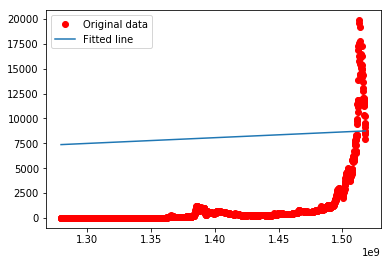

In [13]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
            print '-----------------------------------------'
            print ('pred', sess.run(pred, feed_dict={X: x, Y: y}))
            print ('W', sess.run(W))
            print ('X', sess.run(X, feed_dict={X: x, Y: y}))
            print ('b', sess.run(b))
            print ('y', y)
            print ('powa', sess.run(powa, feed_dict={X: x, Y: y}))
            print '-----------------------------------------'


        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()